In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
df = pd.read_excel('ARLEN AND YANNICK, gilt bronzes only Master Shared CHARMed PyMca Database 2.1 (1).xlsx')

/Users/alexischastang/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [67]:
df

,Unique Identifier,Spectrum Name,Cr,Unnamed: 3,Unnamed: 4,Unnamed: 5,Mn,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Pb.1,PbM.1,Bi.1,nan.6,nan.7,nan.8,nan.9,nan.10,nan.11,Images
0,1.0,26769_1_1.csv,0.007958,±,0.019812,*,0.001045,±,0.006752,*,...,0.197114,NaN,0.011955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,26769_1_2.csv,0.000337,±,0.017943,*,0.001352,±,0.006758,*,...,0.198571,NaN,0.011860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,26769_1_2Front.csv,-0.009762,±,0.015568,*,0.002132,±,0.006774,*,...,0.199794,NaN,0.011918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,37305_1_1brushed.csv,0.002273,±,0.018412,*,0.006940,±,0.006875,NaN,...,0.205693,NaN,0.011892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,37305_2_1.csv,-0.010775,±,0.015337,*,0.002790,±,0.006788,*,...,0.199332,NaN,0.011857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df = df.drop(df[df['Mean Date'] == 'Unknown'].index)
df = df.drop(df[df['Mean Date'] == '800BC'].index)
df = df.drop(df[df['Mean Date'] < 1650].index)

In [70]:
def filter_df(df, words_to_delete):
    pattern = '|'.join(words_to_delete)
    return df[~df['Spectrum Name'].astype(str).str.contains(pattern, case=False, regex=True)]

words_to_delete = ['gilding', 'patinated', 'soldering', 'brass', 'pewter', 'lock','hoard']

filtered_df = filter_df(df, words_to_delete)
print(filtered_df)

      Unique Identifier         Spectrum Name        Cr Unnamed: 3  \
0                   1.0         26769_1_1.csv  0.007958          ±   
1                   2.0         26769_1_2.csv  0.000337          ±   
2                   3.0    26769_1_2Front.csv -0.009762          ±   
3                   4.0  37305_1_1brushed.csv  0.002273          ±   
4                   5.0         37305_2_1.csv -0.010775          ±   
...                 ...                   ...       ...        ...   
9976                NaN                   NaN       NaN        NaN   
9977                NaN                   NaN       NaN        NaN   
9978                NaN                   NaN       NaN        NaN   
9979                NaN                   NaN       NaN        NaN   
9980                NaN                   NaN       NaN        NaN   

      Unnamed: 4 Unnamed: 5        Mn Unnamed: 7  Unnamed: 8 Unnamed: 9  ...  \
0       0.019812          *  0.001045          ±    0.006752          *  ...   

In [71]:
Ag = []
manufactured_years_Ag = []

for index, row in filtered_df.iterrows():
        Ag.append(row['Ag'])
        manufactured_years_Ag.append(row['Mean Date'])

In [72]:
data = {'Elemental Content':Ag,'Year of Manufacture':manufactured_years_Ag}

In [73]:
Silver_graph_df = pd.DataFrame(data)

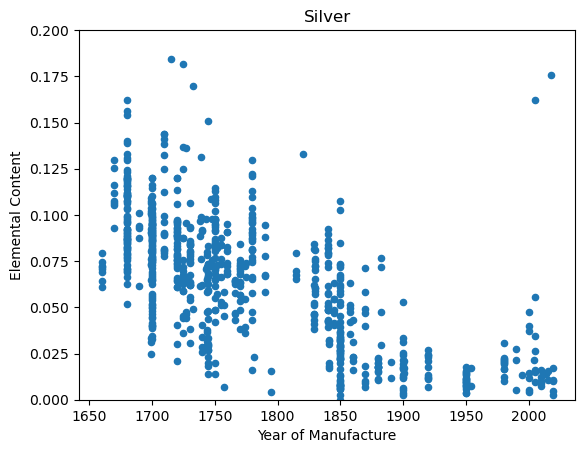

In [74]:
Silver_graph_df.plot.scatter('Year of Manufacture','Elemental Content',ylim=(0,0.2),title='Silver')
plt.savefig('HistoricalBronzeSilver.png')

In [75]:
Fe = []
manufactured_years_Fe = []

for index, row in filtered_df.iterrows():
        Fe.append(row['Fe'])
        manufactured_years_Fe.append(row['Mean Date'])

In [76]:
data1 = {'Elemental Content':Fe,'Year of Manufacture':manufactured_years_Fe}

In [77]:
Iron_graph_df = pd.DataFrame(data1)

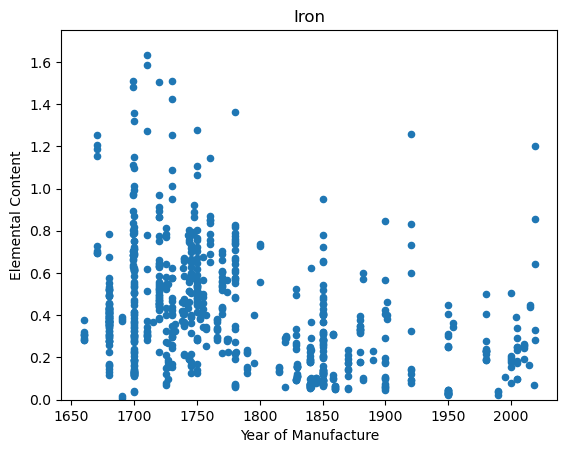

In [78]:
Iron_graph_df.plot.scatter('Year of Manufacture','Elemental Content',ylim=(0,1.75),title='Iron')
plt.savefig('HistoricalBronzeIron.png')

In [79]:
As = []
manufactured_years_As = []

for index, row in filtered_df.iterrows():
        As.append(row['AsKb'])
        manufactured_years_As.append(row['Mean Date'])

In [80]:
data2 = {'Elemental Content':As,'Year of Manufacture':manufactured_years_As}

In [81]:
As_graph_df = pd.DataFrame(data2)

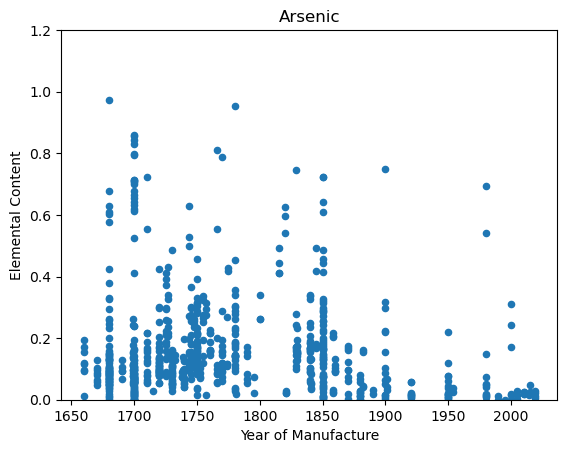

In [82]:
As_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Arsenic',ylim=(0,1.2))
plt.savefig('HistoricalBronzeArsenic.png')

In [83]:
Zn = []
manufactured_years_Zn = []

for index, row in filtered_df.iterrows():
        Zn.append(row['Zn'])
        manufactured_years_Zn.append(row['Mean Date'])

In [84]:
data3 = {'Elemental Content':Zn,'Year of Manufacture':manufactured_years_Zn}

In [85]:
Zn_graph_df = pd.DataFrame(data3)

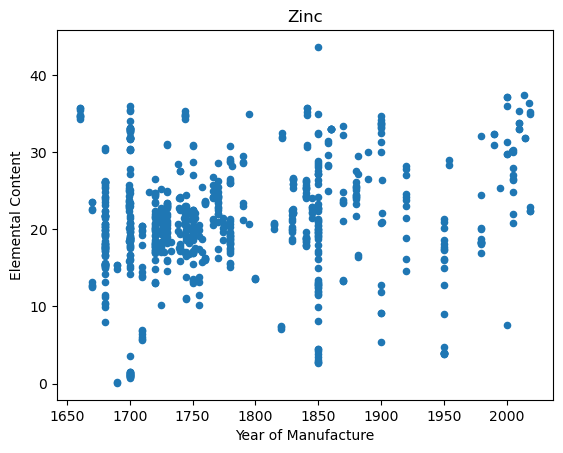

In [86]:
Zn_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Zinc')
plt.savefig('HistoricalBronzeZinc.png')

In [87]:
Pb = []
manufactured_years_Pb = []

for index, row in filtered_df.iterrows():
        Pb.append(row['Pb'])
        manufactured_years_Pb.append(row['Mean Date'])

In [88]:
data4 = {'Elemental Content':Pb,'Year of Manufacture':manufactured_years_Pb}

In [89]:
Pb_graph_df = pd.DataFrame(data4)

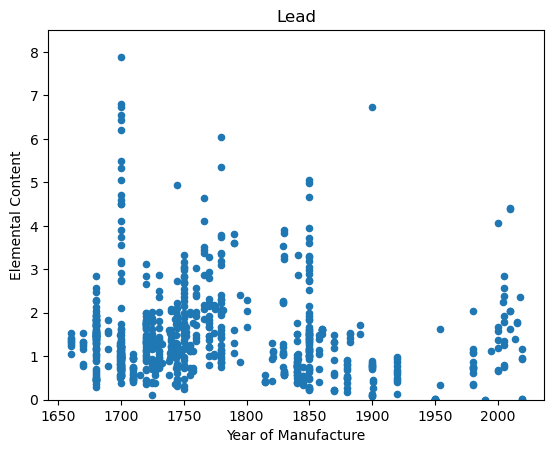

In [90]:
Pb_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Lead',ylim=(0,8.5))
plt.savefig('HistoricalBronzeLead.png')

In [91]:
Sn = []
manufactured_years_Sn = []

for index, row in filtered_df.iterrows():
        Sn.append(row['SnK'])
        manufactured_years_Sn.append(row['Mean Date'])

In [92]:
data5 = {'Elemental Content':Sn,'Year of Manufacture':manufactured_years_Sn}

In [93]:
Sn_graph_df = pd.DataFrame(data5)

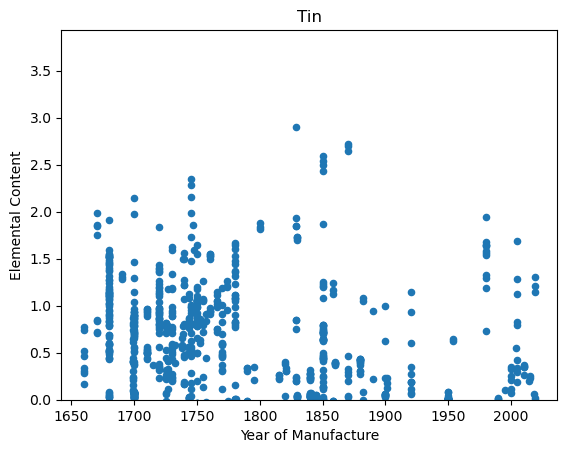

In [94]:
Sn_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Tin',ylim=(0,3.93))
plt.savefig('HistoricalBronzeTin.png')

In [95]:
Sb = []
manufactured_years_Sb = []

for index, row in filtered_df.iterrows():
        Sb.append(row['Sb'])
        manufactured_years_Sb.append(row['Mean Date'])

In [96]:
data6 = {'Elemental Content':Sb,'Year of Manufacture':manufactured_years_Sb}

In [97]:
Sb_graph_df = pd.DataFrame(data6)

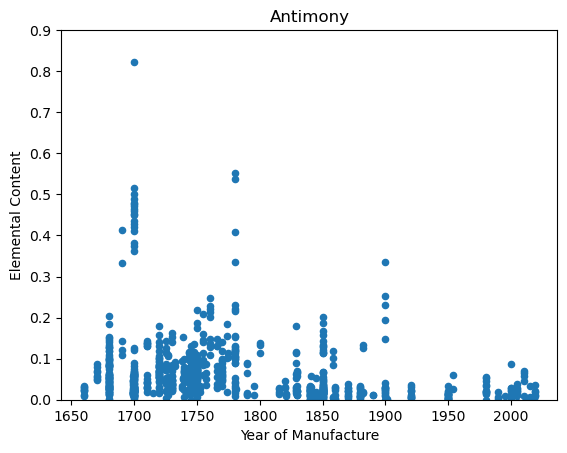

In [98]:
Sb_graph_df.plot.scatter('Year of Manufacture','Elemental Content',title='Antimony',ylim=(0,0.9))
plt.savefig('HistoricalBronzeAntimony.png')